<a href="https://colab.research.google.com/github/ZeedKey/RandomForestClassifier/blob/main/RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [611]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import seaborn as sns

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

train_data = pd.read_csv("/content/train.csv")
test_data = pd.read_csv("/content/test.csv")

In [612]:
from sklearn.model_selection import GridSearchCV

In [613]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Honorific extraction**

In [642]:
names_list = list(train_data['Name'].values)

In [643]:
names_list = [name.split() for name in names_list]
honor_list = []
honors = ['Mrs.','Mr.','Master.','Don.',
          'Rev.','Dr.','Ms.','Major.',
          'Col.', 'Miss.']

**Important! <br>**
**Incorrect or missing honorifics are replaced with NaNs**

In [644]:
for name in names_list:
  tmp = 'NaN'
  for part in name:
    part.strip()
    if part in honors:
      tmp=part
  honor_list.append(tmp)

In [645]:
honor_list = pd.DataFrame(honor_list)
honor_list.describe()

,0
count,891
unique,11
top,Mr.
freq,517


**Adding new column named 'Honorific'**


In [646]:
train_data['Honorific'] = honor_list

**Honorific is a valuable feature**

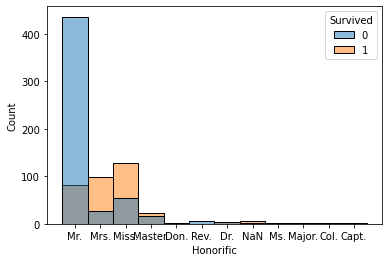

In [619]:
sns.histplot(data=train_data, x='Honorific', hue="Survived")

**Adding new feature named 'MoreTwoSibSp'**

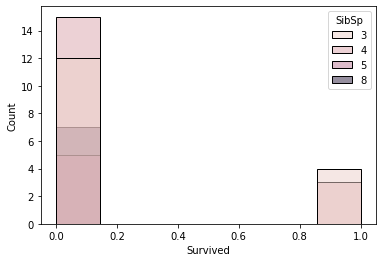

In [620]:
more_two = train_data[ train_data['SibSp']>2 ]
sns.histplot(data=more_two, x='Survived', hue='SibSp')

In [621]:
train_data['MoreTwoSibSp'] = (train_data['SibSp']>2).astype(int)

**Fare is a valuable feature**

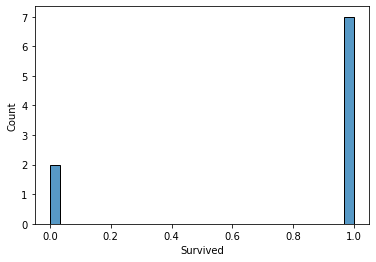

In [622]:
sns.histplot( data=train_data[ train_data['Fare']>250],x='Survived', bins=30)

**Creating new features 'isExp', 'isCheap'**<br>
___________________
**So in the context expensive price of a ticket starts from 250 dollars and the cheapest tickets are priced below 10 dollars.**


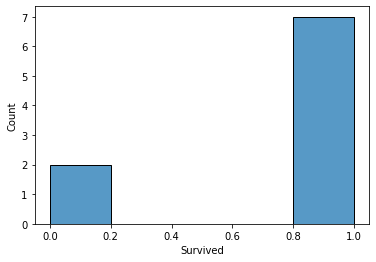

In [623]:
sns.histplot( data=train_data[ train_data['Fare']>250],x='Survived')

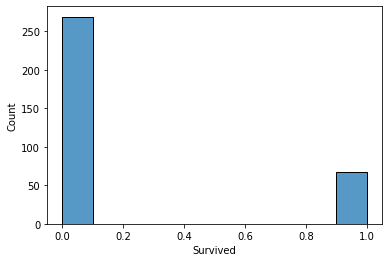

In [624]:
sns.histplot( data=train_data[ train_data['Fare']<=10],x='Survived')

In [625]:
train_data['isExp'] = (train_data['Fare']>250).astype(int)
train_data['isCheap'] = (train_data['Fare']<10).astype(int)

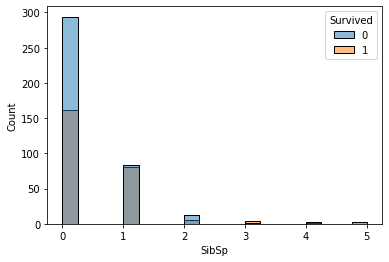

In [626]:
sns.histplot( data=train_data[ train_data['Age']>10], x='SibSp', hue='Survived', bins=20)

**Preparing train data for model**

In [627]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Honorific,MoreTwoSibSp,isExp,isCheap
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr.,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs.,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss.,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs.,0,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr.,0,0,1


In [628]:
features = ['isFemale', 'Honorific', 'MoreTwoSibSp', 'isExp', 'isCheap', 'Pclass', 'Parch', 'SibSp']
y = train_data['Survived']

In [629]:
train_data['isFemale'] = (train_data['Sex']=='female').astype(int)

In [648]:
x_train,x_test,y_train,y_test= train_test_split(train_data[features],y,test_size=0.3, random_state=10)

In [649]:
x_train = pd.get_dummies(x_train)
x_test = pd.get_dummies(x_test)

**Preparing test data for model**

In [632]:
test_data['isFemale'] = (test_data['Sex']=='female').astype(int)
test_data['isExp'] = (test_data['Fare']>250).astype(int)
test_data['isCheap'] = (test_data['Fare']<10).astype(int)
test_data['MoreTwoSibSp'] = (test_data['SibSp']>2).astype(int)

In [633]:
names_list = list(test_data['Name'].values)

names_list = [name.split() for name in names_list]
honor_list = []
honors = ['Mrs.','Mr.','Master.','Don.',
          'Rev.','Dr.','Ms.','Major.',
          'Col.', 'Miss.']

for name in names_list:
  tmp = 'NaN'
  for part in name:
    part.strip()
    if part in honors:
      tmp=part
  honor_list.append(tmp)

In [634]:
honor_list = pd.DataFrame(honor_list)
test_data['Honorific'] = honor_list

In [635]:
test_data = pd.get_dummies(test_data[features])
test_data

,isFemale,MoreTwoSibSp,isExp,isCheap,Pclass,Parch,SibSp,Honorific_Col.,Honorific_Dr.,Honorific_Master.,Honorific_Miss.,Honorific_Mr.,Honorific_Mrs.,Honorific_Ms.,Honorific_NaN,Honorific_Rev.
0,0,0,0,1,3,0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,1,3,0,1,0,0,0,0,0,1,0,0,0
2,0,0,0,1,2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,1,3,0,0,0,0,0,0,1,0,0,0,0
4,1,0,0,0,3,1,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,0,0,0,1,3,0,0,0,0,0,0,1,0,0,0,0
414,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
415,0,0,0,1,3,0,0,0,0,0,0,1,0,0,0,0
416,0,0,0,1,3,0,0,0,0,0,0,1,0,0,0,0


**Setting up model**

In [636]:
#11 estm
#True warm
#depth 4
#3 rns st
#2 jobs
error = []
params = {
          'n_jobs' : range(1,30),
          }

In [650]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 623 entries, 7 to 265
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   isFemale           623 non-null    int64
 1   MoreTwoSibSp       623 non-null    int64
 2   isExp              623 non-null    int64
 3   isCheap            623 non-null    int64
 4   Pclass             623 non-null    int64
 5   Parch              623 non-null    int64
 6   SibSp              623 non-null    int64
 7   Honorific_Col.     623 non-null    uint8
 8   Honorific_Dr.      623 non-null    uint8
 9   Honorific_Master.  623 non-null    uint8
 10  Honorific_Miss.    623 non-null    uint8
 11  Honorific_Mr.      623 non-null    uint8
 12  Honorific_Mrs.     623 non-null    uint8
 13  Honorific_Ms.      623 non-null    uint8
 14  Honorific_NaN      623 non-null    uint8
 15  Honorific_Rev.     623 non-null    uint8
dtypes: int64(7), uint8(9)
memory usage: 44.4 KB


In [651]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   isFemale           418 non-null    int64
 1   MoreTwoSibSp       418 non-null    int64
 2   isExp              418 non-null    int64
 3   isCheap            418 non-null    int64
 4   Pclass             418 non-null    int64
 5   Parch              418 non-null    int64
 6   SibSp              418 non-null    int64
 7   Honorific_Col.     418 non-null    uint8
 8   Honorific_Dr.      418 non-null    uint8
 9   Honorific_Master.  418 non-null    uint8
 10  Honorific_Miss.    418 non-null    uint8
 11  Honorific_Mr.      418 non-null    uint8
 12  Honorific_Mrs.     418 non-null    uint8
 13  Honorific_Ms.      418 non-null    uint8
 14  Honorific_NaN      418 non-null    uint8
 15  Honorific_Rev.     418 non-null    uint8
dtypes: int64(7), uint8(9)
memory usage: 26.7 KB


In [657]:
model = RandomForestClassifier(n_estimators=3,warm_start=True,max_depth=7,random_state=1,n_jobs=45, min_samples_leaf=125)
model.fit(x_train,y_train)
pred = model.predict(x_test)
accuracy_score(y_test,pred)

ValueError: ignored

In [655]:
output = pd.DataFrame(
    {
        'PassengerID': test_data.PassengerId,
        'Survived': pred
    }
).to_csv('submissions.csv', index=False)

##Note just for me##
<br>
Check the 'Embarked' label
